In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import ttest_1samp
sns.set(style="ticks")
import reverse_geocoder as rg
from scipy.stats import ttest_ind

In [2]:
# The path to our CSV file
rig_file = "rig_count_output.csv"

# Read our rig count data into pandas
rig_df = pd.read_csv(rig_file)

rig_df.head()

,Unix,Alabama,Alaska,Arizona,Arkansas,California,Colorado,D.C.,Delaware,Florida,...,Tennesee,Texas,Utah,Vermont,Virginia,W. Virgina,Wash.,Wisconsin,Wyoming,Time
0,946684800.0,1.50,4.50,0.0,0.25,16.50,18.25,0.0,0.0,0.0,...,0.0,268.75,14.00,0.0,0.25,9.75,0.0,0.0,38.75,1.0
1,949363200.0,0.25,4.75,0.0,0.00,16.75,17.25,0.0,0.0,0.0,...,0.0,277.25,14.00,0.0,0.25,5.00,0.0,0.0,34.00,2.0
2,951868800.0,0.80,5.80,0.0,0.00,18.00,17.60,0.0,0.0,0.0,...,0.0,273.20,15.60,0.0,1.20,5.80,0.0,0.0,30.20,3.0
3,954547200.0,1.50,4.50,0.0,2.25,18.25,18.25,0.0,0.0,0.0,...,0.0,285.00,14.50,0.0,2.00,10.00,0.0,0.0,28.25,4.0
4,957139200.0,2.00,5.25,0.0,6.00,20.25,17.00,0.0,0.0,0.0,...,0.0,295.00,15.75,0.0,2.75,11.25,0.0,0.0,29.75,5.0


In [3]:
# The path to our CSV file
seismic_file = "seismic_data_9-28-17.csv"

# Read our rig count data into pandas
seismic_df = pd.read_csv(seismic_file)

seismic_df.columns

Index(['Unnamed: 0', 'alert', 'cd_by_month', 'cd_by_year', 'cd_for_plot',
       'cdi', 'code', 'converted_date', 'coordinates_3', 'detail', 'dmin',
       'epoch_by_month', 'felt', 'gap', 'geo_type', 'ids', 'lat', 'lng', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url'],
      dtype='object')

In [4]:
reverse_geo = seismic_df
reverse_geo.head()

,Unnamed: 0,alert,cd_by_month,cd_by_year,cd_for_plot,cdi,code,converted_date,coordinates_3,detail,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,0,NaN,04-1906,1906,1906-04-18 13:12:27.000,NaN,16957905,04-18-1906,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,",iscgem,",automatic,-2010394053000,"M 7.7 - San Pablo Bay, California",0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...
1,1,NaN,04-1906,1906,1915-10-03 06:53:21.000,NaN,913944,04-18-1906,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,",iscgem,",automatic,-1711904799000,M 6.8 - Nevada,0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...
2,2,NaN,10-1915,1915,1918-07-15 00:23:13.000,NaN,913200,10-03-1915,15.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,",iscgem,is,iscgemsup,",automatic,-1624145807000,M 6.4 - offshore Northern California,0,earthquake,",origin,",NaN,1436806942000,https://earthquake.usgs.gov/earthquakes/eventp...
3,3,NaN,07-1918,1918,1918-05-23 11:57:40.000,NaN,913151,07-15-1918,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,",is,iscgem,iscgemsup,",automatic,-1628683340000,"M 6.8 - Sonora, Mexico",0,earthquake,",origin,",NaN,1436806942000,https://earthquake.usgs.gov/earthquakes/eventp...
4,4,NaN,05-1918,1918,1918-04-21 22:32:29.000,NaN,913126,05-23-1918,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,",iscgem,",automatic,-1631410051000,M 6.7 - Southern California,0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...


In [5]:
# Create a state column for the reverse_geo
reverse_geo['State'] = ''
reverse_geo.columns

Index(['Unnamed: 0', 'alert', 'cd_by_month', 'cd_by_year', 'cd_for_plot',
       'cdi', 'code', 'converted_date', 'coordinates_3', 'detail', 'dmin',
       'epoch_by_month', 'felt', 'gap', 'geo_type', 'ids', 'lat', 'lng', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url', 'State'],
      dtype='object')

In [6]:
#counter = 0
result = []

# Populate the DF
#for index, row in reverse_geo.iterrows():
  #  try:
        # Counter keeps track of where we are in record retrieval process
       #counter += 1
       
     #   coordinates = (row['lat'], row['lng'])
        #print(coordinates)
        
       # result = rg.search(coordinates) # default mode = 2
       # print(result)
        #state = result['admin1']
        #print(result.get('admin1'))
      #  reverse_geo.set_value(index, "State", result.get([3]['admin1']))
      #  break
        
        
                                      
                                      
       
  #  except:
    #    print('error.')
       
        
        
reverse_geo.head()

,Unnamed: 0,alert,cd_by_month,cd_by_year,cd_for_plot,cdi,code,converted_date,coordinates_3,detail,...,status,time,title,tsunami,type,types,tz,updated,url,State
0,0,NaN,04-1906,1906,1906-04-18 13:12:27.000,NaN,16957905,04-18-1906,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,automatic,-2010394053000,"M 7.7 - San Pablo Bay, California",0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...,
1,1,NaN,04-1906,1906,1915-10-03 06:53:21.000,NaN,913944,04-18-1906,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,automatic,-1711904799000,M 6.8 - Nevada,0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...,
2,2,NaN,10-1915,1915,1918-07-15 00:23:13.000,NaN,913200,10-03-1915,15.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,automatic,-1624145807000,M 6.4 - offshore Northern California,0,earthquake,",origin,",NaN,1436806942000,https://earthquake.usgs.gov/earthquakes/eventp...,
3,3,NaN,07-1918,1918,1918-05-23 11:57:40.000,NaN,913151,07-15-1918,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,automatic,-1628683340000,"M 6.8 - Sonora, Mexico",0,earthquake,",origin,",NaN,1436806942000,https://earthquake.usgs.gov/earthquakes/eventp...,
4,4,NaN,05-1918,1918,1918-04-21 22:32:29.000,NaN,913126,05-23-1918,10.0,https://earthquake.usgs.gov/fdsnws/event/1/que...,...,automatic,-1631410051000,M 6.7 - Southern California,0,earthquake,",origin,",NaN,1431543161000,https://earthquake.usgs.gov/earthquakes/eventp...,


In [7]:
seismic_df.rename(columns={'epoch_by_month': 'Unix'}, inplace=True)
seismic_df.columns

Index(['Unnamed: 0', 'alert', 'cd_by_month', 'cd_by_year', 'cd_for_plot',
       'cdi', 'code', 'converted_date', 'coordinates_3', 'detail', 'dmin',
       'Unix', 'felt', 'gap', 'geo_type', 'ids', 'lat', 'lng', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url', 'State'],
      dtype='object')

In [8]:
seismic_df = seismic_df.pivot_table(index = 'Unix', aggfunc = np.mean)
seismic_df

,Unnamed: 0,cd_by_year,cdi,coordinates_3,dmin,felt,gap,lat,lng,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
Unix,,,,,,,,,,,,,,,,,,
-2011910400,0.5,1906.0,NaN,10.000000,NaN,NaN,NaN,39.157000,-120.028500,7.250000,NaN,NaN,NaN,811.500000,-1.861149e+12,0.000000,NaN,1.431543e+12
-1712102400,2.0,1915.0,NaN,15.000000,NaN,NaN,NaN,41.304000,-124.694000,6.400000,NaN,NaN,NaN,630.000000,-1.624146e+12,0.000000,NaN,1.436807e+12
-1633219200,5.0,1918.0,6.400000,10.000000,NaN,77.000000,NaN,34.300000,-119.800000,6.820000,NaN,NaN,NaN,765.000000,-1.404552e+12,0.000000,-480.000000,1.498272e+12
-1630627200,4.0,1918.0,NaN,10.000000,NaN,NaN,NaN,33.647000,-117.433000,6.700000,NaN,NaN,NaN,691.000000,-1.631410e+12,0.000000,NaN,1.431543e+12
-1625356800,3.0,1918.0,NaN,10.000000,NaN,NaN,NaN,27.102000,-110.122000,6.800000,NaN,NaN,NaN,711.000000,-1.628683e+12,0.000000,NaN,1.436807e+12
-1509667200,10.0,1922.0,NaN,10.000000,NaN,NaN,NaN,27.091000,-105.779000,6.400000,NaN,NaN,NaN,630.000000,-1.299095e+12,0.000000,NaN,1.431543e+12
-1464912000,9.0,1923.0,NaN,10.000000,NaN,NaN,NaN,34.243000,-119.097000,6.500000,NaN,NaN,NaN,650.000000,-1.508849e+12,0.000000,NaN,1.431543e+12
-1414972800,8.0,1925.0,NaN,10.000000,NaN,NaN,NaN,24.813000,-109.063000,6.500000,NaN,NaN,NaN,650.000000,-1.462495e+12,0.000000,NaN,1.431543e+12
-1407024000,6.5,1925.0,NaN,15.000000,NaN,NaN,NaN,46.931000,-90.668000,6.600000,NaN,NaN,NaN,671.500000,-1.409825e+12,0.000000,NaN,1.431543e+12


In [9]:
counter = 0

seismic_df['Time'] = ''
#rig_count_df['Unix'] = ''
# Populate the DF
for index, row in seismic_df.iterrows():
    try:
        # Counter keeps track of where we are in record retrieval process
       counter += 1
       seismic_df.set_value(index, "Time", counter)
        
        
        
                                      
                                      
       
    except:
       print('error.')
       
        
        
seismic_df.head()

,Unnamed: 0,cd_by_year,cdi,coordinates_3,dmin,felt,gap,lat,lng,mag,mmi,nst,rms,sig,time,tsunami,tz,updated,Time
Unix,,,,,,,,,,,,,,,,,,,
-2011910400,0.5,1906.0,NaN,10.0,NaN,NaN,NaN,39.157,-120.0285,7.25,NaN,NaN,NaN,811.5,-1.861149e+12,0.0,NaN,1.431543e+12,1
-1712102400,2.0,1915.0,NaN,15.0,NaN,NaN,NaN,41.304,-124.6940,6.40,NaN,NaN,NaN,630.0,-1.624146e+12,0.0,NaN,1.436807e+12,2
-1633219200,5.0,1918.0,6.4,10.0,NaN,77.0,NaN,34.300,-119.8000,6.82,NaN,NaN,NaN,765.0,-1.404552e+12,0.0,-480.0,1.498272e+12,3
-1630627200,4.0,1918.0,NaN,10.0,NaN,NaN,NaN,33.647,-117.4330,6.70,NaN,NaN,NaN,691.0,-1.631410e+12,0.0,NaN,1.431543e+12,4
-1625356800,3.0,1918.0,NaN,10.0,NaN,NaN,NaN,27.102,-110.1220,6.80,NaN,NaN,NaN,711.0,-1.628683e+12,0.0,NaN,1.436807e+12,5


In [10]:
combined_df = pd.merge(seismic_df, rig_df, how='inner', right_index = False, left_index=False)
combined_df.dtypes

#rig_df.join(seismic_df)
#rig_df.columns

Unnamed: 0       float64
cd_by_year       float64
cdi              float64
coordinates_3    float64
dmin             float64
felt             float64
gap              float64
lat              float64
lng              float64
mag              float64
mmi              float64
nst              float64
rms              float64
sig              float64
time             float64
tsunami          float64
tz               float64
updated          float64
Time              object
Unix             float64
Alabama          float64
Alaska           float64
Arizona          float64
Arkansas         float64
California       float64
Colorado         float64
D.C.             float64
Delaware         float64
Florida          float64
Georgia          float64
                  ...   
Minn.            float64
Mississippi      float64
Missouri         float64
Montana          float64
N. Carolina      float64
N. Dakota        float64
N. Hamp.         float64
N. Jersey        float64
N. Mexico        float64


In [11]:
# Take a look at it in CSV
#combined_df.to_csv("combined_inner_data.csv")

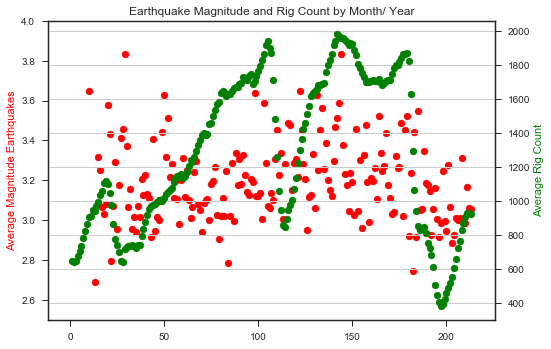

In [26]:
x = (combined_df["Time"])

y1 = combined_df["mag"]
y2 = combined_df["TOTAL US"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='green')


ax1.set_ylim(2.5, 4)

# Incorporate the other graph properties
plt.title("Earthquake Magnitude and Rig Count by Month/ Year")# + " " + year_range)
ax1.set_ylabel("Average Magnitude Earthquakes", color = "r")
ax2.set_ylabel("Average Rig Count", color = "green")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")


# formatter = 
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()

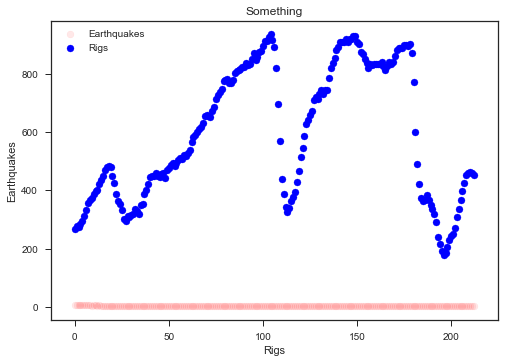

In [13]:

# Plot the Data
plt.scatter(np.arange(0, len(combined_df)), combined_df['mag'], c="r", alpha=0.09, label="Earthquakes")
plt.scatter(np.arange(0, len(combined_df)), combined_df['Texas'],  c="b", label="Rigs")
plt.legend(loc="best")
plt.xlabel("Rigs")
plt.ylabel("Earthquakes")
plt.title("Something")
plt.show()

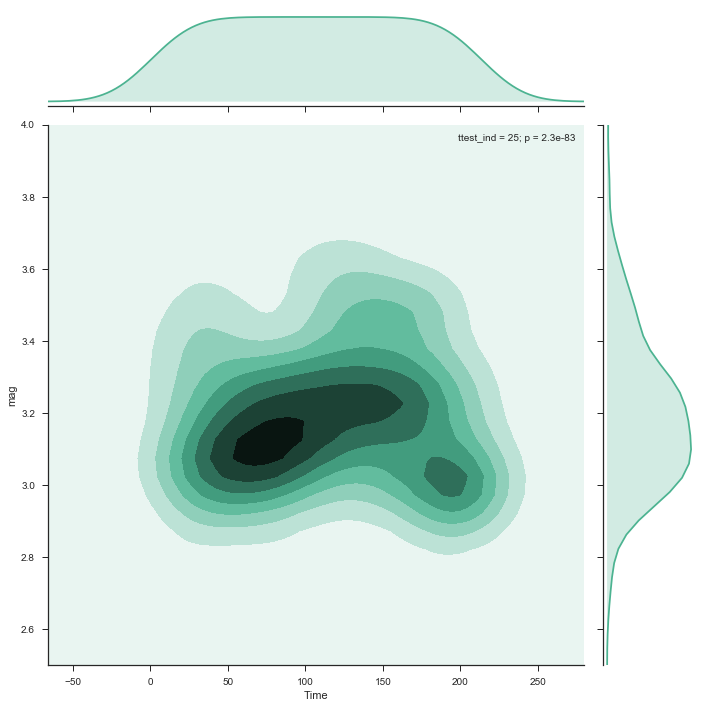

In [14]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = combined_df['Time'], y = combined_df['mag'], size = 10, #data = combined_df['TOTAL US'], 
              kind="kde", stat_func=ttest_ind, color="#4CB391")

#plt.xlim(0, 225)
plt.ylim(2.5, 4)
plt.show()

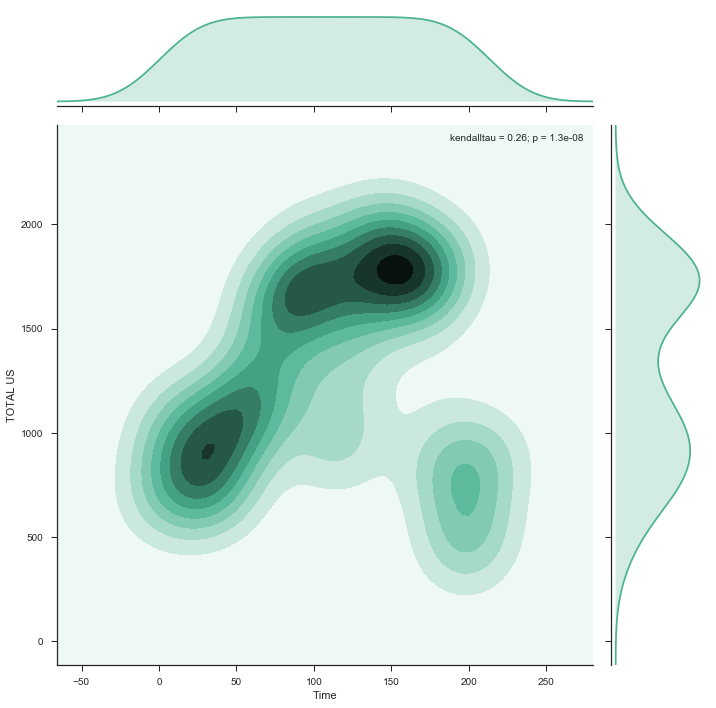

In [15]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = combined_df['Time'], y = combined_df['TOTAL US'], size = 10, #data = combined_df['TOTAL US'], 
              kind="kde", stat_func=kendalltau, color="#4CB391")

#plt.xlim(0, 225)
#plt.ylim(2.5, 4)
plt.show()

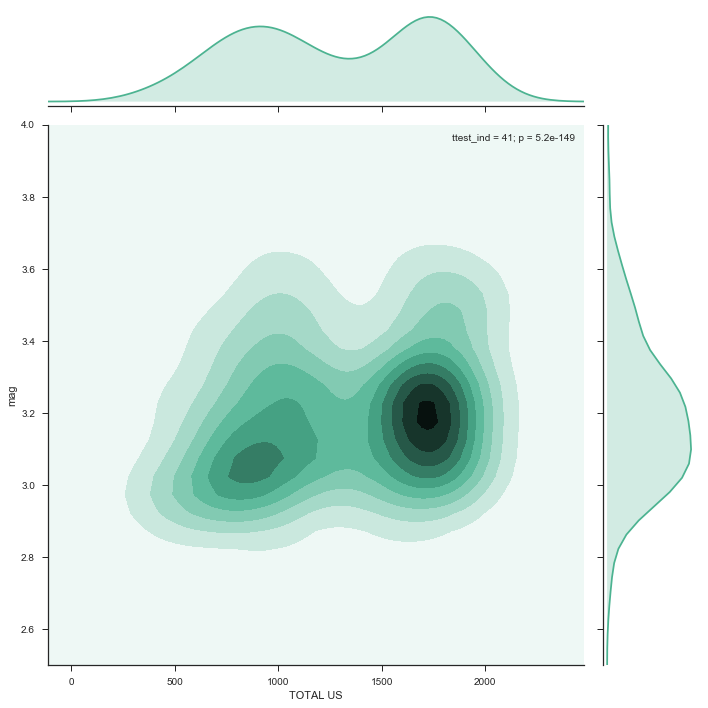

In [16]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = combined_df['TOTAL US'], y = combined_df['mag'], size = 10 # data = rig_count_df
              , kind="kde", stat_func= ttest_ind, 
              color="#4CB391")

#plt.xlim(0, 225)
plt.ylim(2.5, 4)
plt.show()

In [17]:
# Run 1-Sample T-Test
stats.ttest_1samp(a=combined_df['TOTAL US'], popmean=combined_df['mag'].mean())

Ttest_1sampResult(statistic=40.830960906784554, pvalue=2.0666059892906391e-102)

In [18]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['TOTAL US'], combined_df['mag'], equal_var=False)

Ttest_indResult(statistic=40.830893758516027, pvalue=2.0653741008818769e-102)

In [19]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['Oklahoma'], combined_df['mag'], equal_var=False)

Ttest_indResult(statistic=47.231640684210177, pvalue=1.5217210507975217e-114)

In [20]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['Texas'], combined_df['mag'], equal_var=True)

Ttest_indResult(statistic=37.984138664118433, pvalue=1.4884511636458836e-138)

In [21]:
# Run 2-Sample T-Test
#stats.ttest_ind(seismic_df['mag'], rig_df['Texas'], equal_var=False)

In [22]:
# Run Chi-Square Test to determine goodness of fit
#stats.chisquare(f_obs=sorority_counts, f_exp=sorority_expected)

In [23]:
# Chi-squared with contingency
#stats.chi2_contingency(observed= observed)

In [24]:
# Perform the ANOVA
#stats.f_oneway(asian, black, hispanic, other, white)